In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r'D:\Bruno\Datasets\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

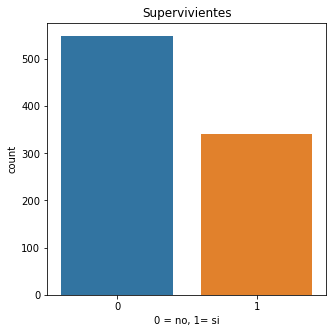

In [11]:
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data=df)
plt.title('Supervivientes')
plt.xlabel('0 = no, 1= si')
plt.show()

In [12]:
supervivientes = np.sum(df.Survived)
print(supervivientes)

342


In [13]:
noSupervivientes =df.shape[0]-np.sum(df.Survived)
print(noSupervivientes)

549


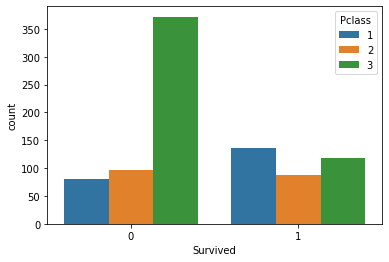

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

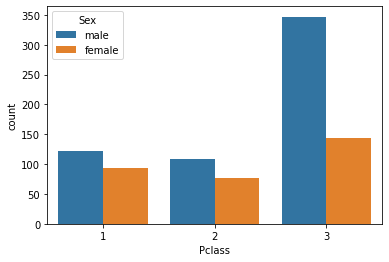

In [16]:
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.show()

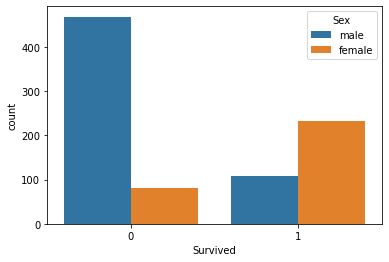

In [20]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis=1)
df.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [7]:
#Transformamos el genero 0 para male y 1 para female
gender = {'male':0, 'female':1}
data=[df]

for dataset in data:
    dataset['Sex']= dataset['Sex'].map(gender)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [8]:
#Saneamos embarked ya que tenia datos nulos
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
df['Embarked'].isnull().sum()

2

In [10]:
common_value = 'S'
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [11]:
df['Embarked'].isnull().sum()


0

In [13]:
#Transformamos los datos de Embarked 
ports = {'S':0, 'C':1, 'Q':2}
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [15]:
#Transformamos fare en 6 conjuntos ya que son datos muy diferentes unos de otros

for dataset in data:
    dataset.loc[dataset['Fare']<=10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare']<=20), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare']<=30), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare']<=100), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare']<=250), 'Fare'] = 4
    dataset.loc[dataset['Fare']>250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [16]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [17]:
X_data = df.drop('Survived', axis=1)
y_survived = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size = 0.3, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_predict = logmodel.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[131,  26],
       [ 32,  79]], dtype=int64)

<AxesSubplot:>

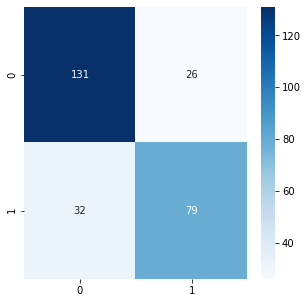

In [27]:
plt.figure(figsize =(5, 5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [30]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [31]:
df.to_csv('Titanic_clean.csv', header=True)